---


<img width=25% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/myself.png" align=right>

# **Credit Risk Assessment Project**

*by Gabriel Capela*

[<img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>](https://www.linkedin.com/in/gabrielcapela)
[<img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white" />](https://medium.com/@gabrielcapela)

---

This project aims to develop a **Machine Learning model capable of predicting the probability of customer default** at the time of a credit card application, even before any payment history is available.

Default prediction is critical to minimize financial losses, preserve institutional credibility, and provide fair and efficient access to credit. However, the task is challenging due to limited data at the application stage, potential classification errors (false positives/negatives), and the need for representative historical data.

The ultimate goal is to provide financial institutions with a **data-driven decision-support tool** that improves the accuracy and fairness of credit approval processes.



<p align="center">
<img width=90% src="https://raw.githubusercontent.com/gabrielcapela/credit_risk/main/images/crisp-dm.jpeg">
</p>



This notebook will cover the **last three phases** of the project: Modeling, Evaluation and Deployment.

#  Modeling

This step will follow the following sequence: First, we will **create a pipeline** for training multiple models, after which **two models will be chosen** to move forward. These two models will be **hyperparameterized** and, finally, they will perharps be combined into a **ensemble model**.

In [26]:
# Importing the data
import pandas as pd
X_train= pd.read_csv("../data/X_train.csv")
X_test= pd.read_csv("../data/X_test.csv")
y_train= pd.read_csv("../data/y_train.csv")
y_test= pd.read_csv("../data/y_test.csv")

print(f'The X_train shape is {X_train.shape[0]} x {X_train.shape[1]}')
print(f'The X_test shape is {X_test.shape[0]} x {X_test.shape[1]}')
print(f'The y_train shape is {y_train.shape[0]} x {y_train.shape[1]}')
print(f'The y_test shape is {y_test.shape[0]} x {y_test.shape[1]}')


The X_train shape is 26837 x 43
The X_test shape is 11502 x 43
The y_train shape is 26837 x 1
The y_test shape is 11502 x 1


In [27]:
pd.set_option('display.max_columns', None) 
X_train.head()

,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,facebook_profile_False,facebook_profile_True,facebook_profile_not provided,real_state_+qWF9pJpVGtTFn4vFjb/cg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_UX7AdFYgQh+VrVC5eIaU9w==,real_state_n+xK9CfX0bCn77lClTWviw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,target_fraud_fraud_friends_family,target_fraud_fraud_id,target_fraud_without fraud,application_time_category_00-06,application_time_category_06-12,application_time_category_12-18,application_time_category_18-00
0,0.257908,340.0,99.152286,0.847020,92.870042,0.26,0.00,0.0,20184.0,40019.80,38.0,0.0,0.0,4.0,4.0,19,2,0.0,40.0,544,76109.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,0.158149,340.0,101.423644,0.210806,99.129450,0.20,0.00,0.0,0.0,48317.98,44.0,0.0,0.0,7.0,7.0,342,2,0.0,26.0,253,140446.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0.098999,570.0,95.921783,0.832893,98.034083,0.23,0.00,0.0,35608.0,60030.76,0.0,0.0,0.0,9.0,9.0,151,1,0.0,3.0,414,97117.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
3,0.033755,390.0,98.590815,0.587373,96.835089,0.11,15012.31,36.0,27642.0,46531.29,0.0,0.0,0.0,12.0,12.0,202,3,1.0,50.0,230,51217.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,0.111632,420.0,97.737889,0.705368,102.029359,0.40,0.00,0.0,0.0,57747.06,0.0,0.0,0.0,7.0,0.0,477,1,0.0,15.0,58,104002.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0


## Baseline

A baseline model provides a **simple performance reference** to evaluate more complex models. It helps identify if your advanced techniques are truly adding value. Without it, there's no clear benchmark for improvement.

=== Logistic Regression Baseline (Validation Set) ===
Accuracy : 0.8428
F1-Score : 0.0000
LogLoss  : 0.4380

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4524
           1       0.00      0.00      0.00       844

    accuracy                           0.84      5368
   macro avg       0.42      0.50      0.46      5368
weighted avg       0.71      0.84      0.77      5368



/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

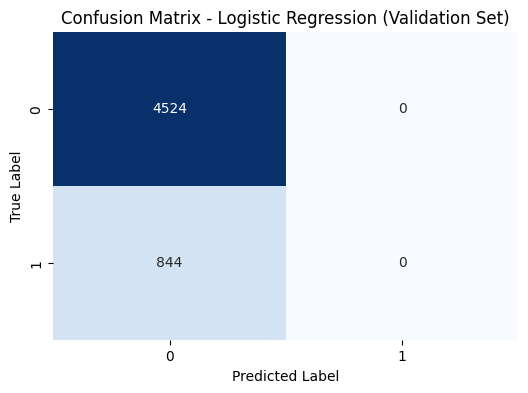

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score, log_loss, confusion_matrix,
    classification_report, accuracy_score
)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Split the training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split.values.ravel()) 


# Make predictions on validation set
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

# Evaluate metrics on validation set
f1 = f1_score(y_val, y_pred)
ll = log_loss(y_val, y_proba)
accuracy = accuracy_score(y_val, y_pred)

# Print classification report
print("=== Logistic Regression Baseline (Validation Set) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"LogLoss  : {ll:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression (Validation Set)")
plt.show()


The model is biased towards the majority class, as evidenced by the lack of predictions for the minority class. To improve performance, it's crucial to address class imbalance using techniques like class weighting or resampling.

## Creating a Pipeline

A Pipeline is used to streamline the machine learning workflow by **chaining together preprocessing steps—such** as data scaling and sampling techniques—with model training. This structure helps avoid code repetition and makes it easier to test multiple models consistently. 

Alongside that, we apply **cross-validation** (CV), a technique that splits the training data into several folds to train and evaluate the model multiple times. This ensures a more reliable assessment of model performance, reduces overfitting, and provides more robust evaluation metrics by averaging results across different data partitions.


Modelo: Logistic Regression | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.6975
F1-Score (classe 1): 0.3954
LogLoss: 0.5805

Classification Report:
              precision    recall  f1-score   support

           0     0.9112    0.7102    0.7983      4524
           1     0.2883    0.6291    0.3954       844

    accuracy                         0.6975      5368
   macro avg     0.5998    0.6697    0.5968      5368
weighted avg     0.8133    0.6975    0.7349      5368



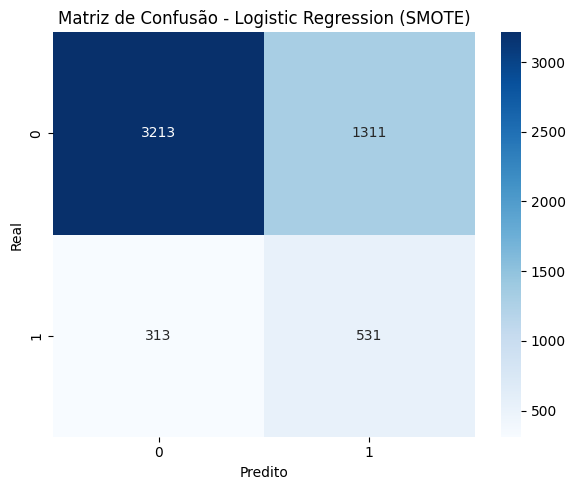


Modelo: Logistic Regression | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.6984
F1-Score (classe 1): 0.3966
LogLoss: 0.5829

Classification Report:
              precision    recall  f1-score   support

           0     0.9116    0.7111    0.7990      4524
           1     0.2893    0.6303    0.3966       844

    accuracy                         0.6984      5368
   macro avg     0.6004    0.6707    0.5978      5368
weighted avg     0.8137    0.6984    0.7357      5368



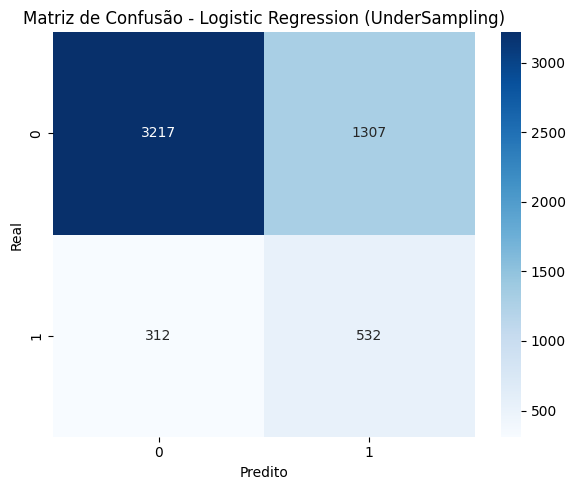


Modelo: Random Forest | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia: 0.8554
F1-Score (classe 1): 0.2971
LogLoss: 0.3986

Classification Report:
              precision    recall  f1-score   support

           0     0.8669    0.9788    0.9194      4524
           1     0.6308    0.1943    0.2971       844

    accuracy                         0.8554      5368
   macro avg     0.7488    0.5865    0.6083      5368
weighted avg     0.8298    0.8554    0.8216      5368



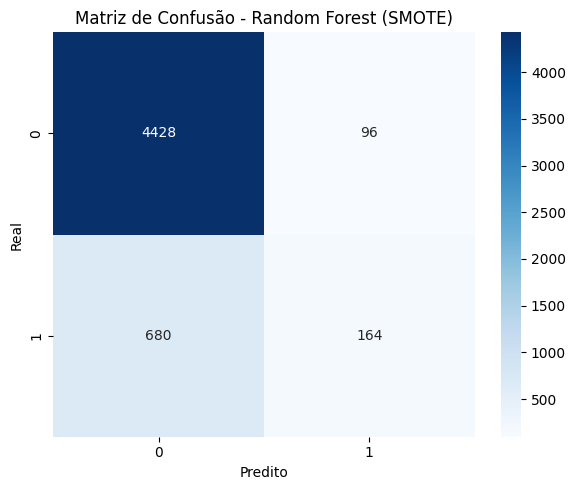


Modelo: Random Forest | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia: 0.6900
F1-Score (classe 1): 0.3949
LogLoss: 0.5942

Classification Report:
              precision    recall  f1-score   support

           0     0.9131    0.6987    0.7916      4524
           1     0.2849    0.6434    0.3949       844

    accuracy                         0.6900      5368
   macro avg     0.5990    0.6710    0.5933      5368
weighted avg     0.8143    0.6900    0.7293      5368



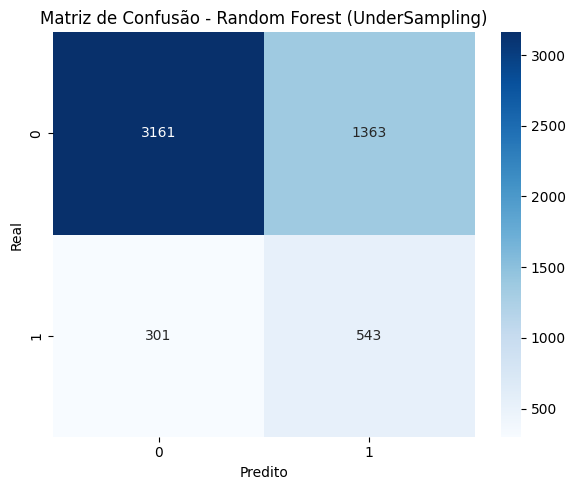


Modelo: K-Nearest Neighbors | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia: 0.5626
F1-Score (classe 1): 0.2802
LogLoss: 4.7488

Classification Report:
              precision    recall  f1-score   support

           0     0.8688    0.5665    0.6858      4524
           1     0.1890    0.5415    0.2802       844

    accuracy                         0.5626      5368
   macro avg     0.5289    0.5540    0.4830      5368
weighted avg     0.7619    0.5626    0.6221      5368



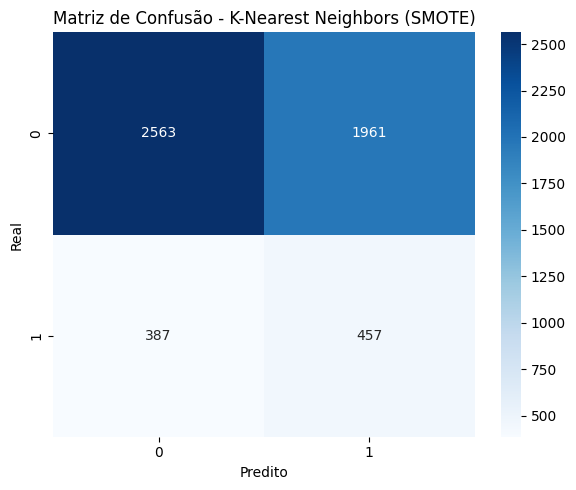


Modelo: K-Nearest Neighbors | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia: 0.6112
F1-Score (classe 1): 0.3018
LogLoss: 1.6452

Classification Report:
              precision    recall  f1-score   support

           0     0.8781    0.6256    0.7306      4524
           1     0.2103    0.5344    0.3018       844

    accuracy                         0.6112      5368
   macro avg     0.5442    0.5800    0.5162      5368
weighted avg     0.7731    0.6112    0.6632      5368



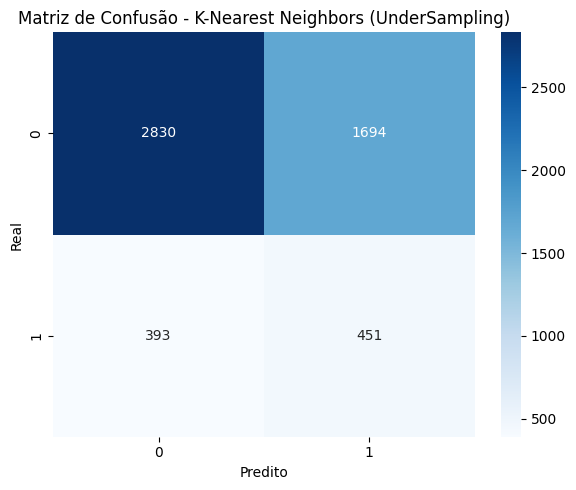


Modelo: Gradient Boosting | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.8556
F1-Score (classe 1): 0.3336
LogLoss: 0.3925

Classification Report:
              precision    recall  f1-score   support

           0     0.8713    0.9724    0.9190      4524
           1     0.6082    0.2299    0.3336       844

    accuracy                         0.8556      5368
   macro avg     0.7397    0.6011    0.6263      5368
weighted avg     0.8299    0.8556    0.8270      5368



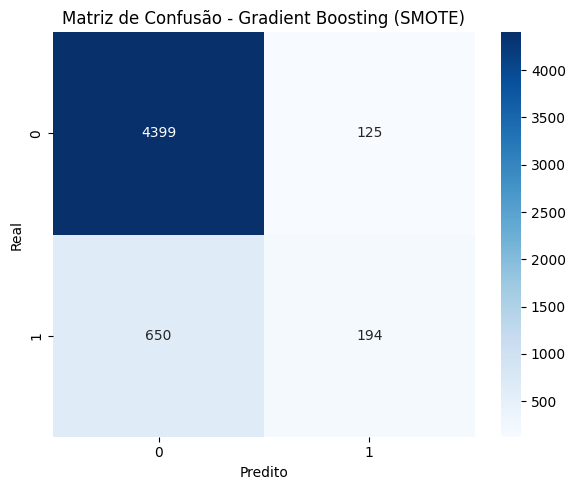


Modelo: Gradient Boosting | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.7014
F1-Score (classe 1): 0.4016
LogLoss: 0.5843

Classification Report:
              precision    recall  f1-score   support

           0     0.9134    0.7133    0.8010      4524
           1     0.2932    0.6374    0.4016       844

    accuracy                         0.7014      5368
   macro avg     0.6033    0.6754    0.6013      5368
weighted avg     0.8159    0.7014    0.7382      5368



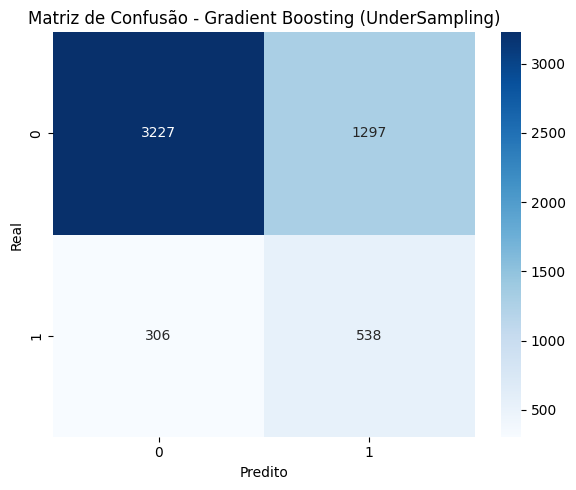


Modelo: Decision Tree | Balanceamento: SMOTE
Acurácia: 0.7532
F1-Score (classe 1): 0.2740
LogLoss: 8.8968

Classification Report:
              precision    recall  f1-score   support

           0     0.8646    0.8384    0.8513      4524
           1     0.2548    0.2962    0.2740       844

    accuracy                         0.7532      5368
   macro avg     0.5597    0.5673    0.5626      5368
weighted avg     0.7687    0.7532    0.7605      5368



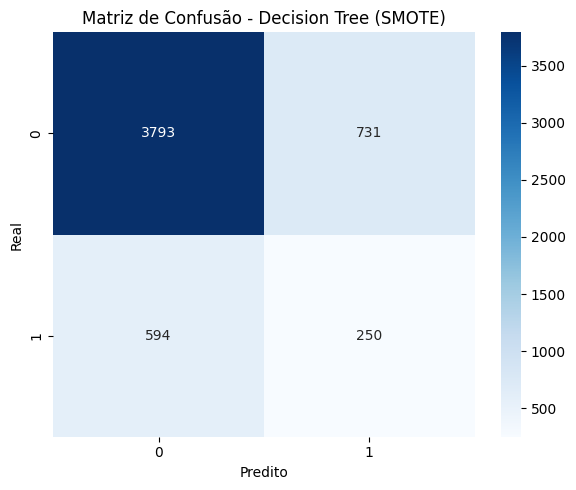


Modelo: Decision Tree | Balanceamento: UnderSampling
Acurácia: 0.5933
F1-Score (classe 1): 0.3193
LogLoss: 14.6578

Classification Report:
              precision    recall  f1-score   support

           0     0.8895    0.5908    0.7101      4524
           1     0.2167    0.6066    0.3193       844

    accuracy                         0.5933      5368
   macro avg     0.5531    0.5987    0.5147      5368
weighted avg     0.7837    0.5933    0.6486      5368



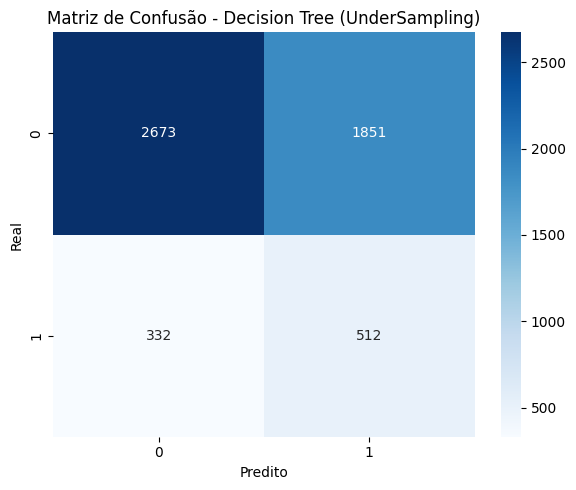


Modelo: Naive Bayes | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.3841
F1-Score (classe 1): 0.3113
LogLoss: 2.8456

Classification Report:
              precision    recall  f1-score   support

           0     0.9313    0.2907    0.4431      4524
           1     0.1888    0.8851    0.3113       844

    accuracy                         0.3841      5368
   macro avg     0.5601    0.5879    0.3772      5368
weighted avg     0.8146    0.3841    0.4223      5368



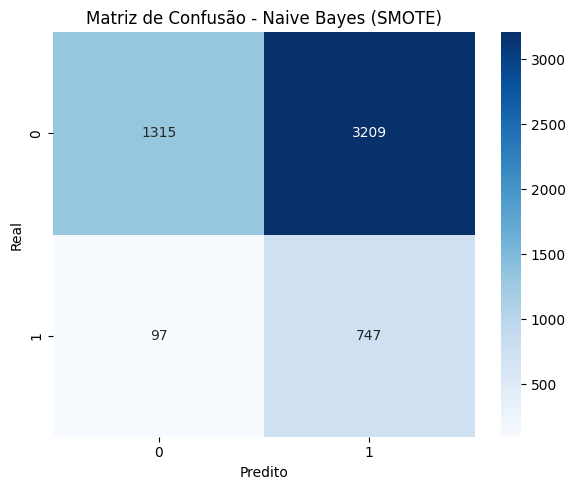


Modelo: Naive Bayes | Balanceamento: UnderSampling
Acurácia: 0.8266
F1-Score (classe 1): 0.3671
LogLoss: 1.2277

Classification Report:
              precision    recall  f1-score   support

           0     0.8789    0.9211    0.8995      4524
           1     0.4306    0.3199    0.3671       844

    accuracy                         0.8266      5368
   macro avg     0.6548    0.6205    0.6333      5368
weighted avg     0.8084    0.8266    0.8158      5368



/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


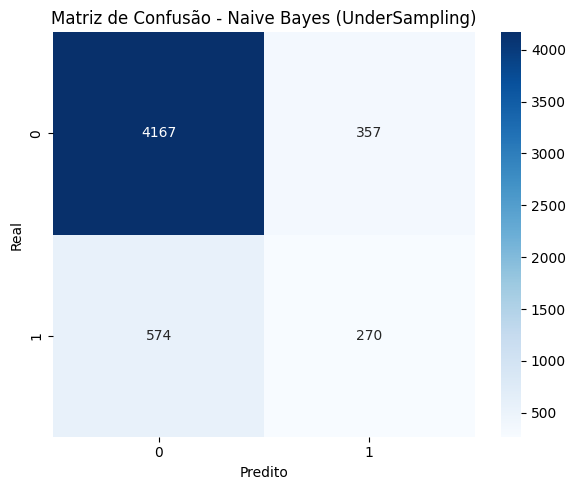


Modelo: XGBoost | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:25:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.8526
F1-Score (classe 1): 0.3302
LogLoss: 0.4006

Classification Report:
              precision    recall  f1-score   support

           0     0.8710    0.9686    0.9172      4524
           1     0.5786    0.2310    0.3302       844

    accuracy                         0.8526      5368
   macro avg     0.7248    0.5998    0.6237      5368
weighted avg     0.8250    0.8526    0.8249      5368



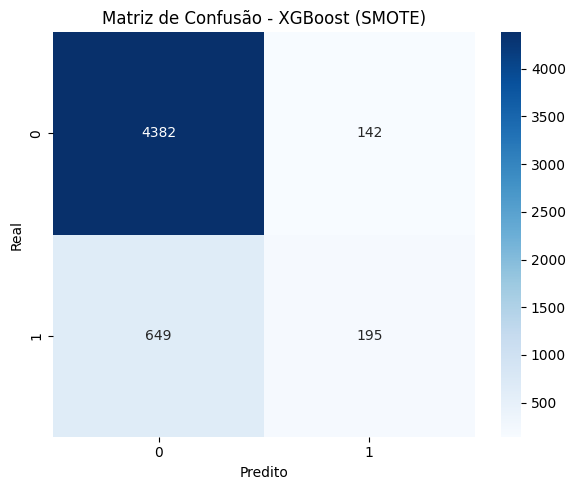


Modelo: XGBoost | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:25:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.6574
F1-Score (classe 1): 0.3674
LogLoss: 0.6677

Classification Report:
              precision    recall  f1-score   support

           0     0.9062    0.6620    0.7651      4524
           1     0.2588    0.6327    0.3674       844

    accuracy                         0.6574      5368
   macro avg     0.5825    0.6474    0.5662      5368
weighted avg     0.8044    0.6574    0.7026      5368



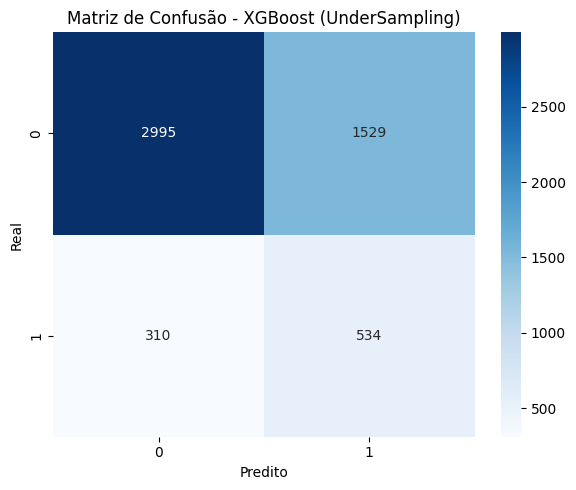


Resumo dos Resultados:
                 Modelo  Balanceamento  Acurácia  F1-Score    LogLoss
0         Decision Tree  UnderSampling  0.593331  0.319302  14.657842
1         Decision Tree          SMOTE  0.753167  0.273973   8.896766
2   K-Nearest Neighbors          SMOTE  0.562593  0.280196   4.748788
3           Naive Bayes          SMOTE  0.384128  0.311250   2.845566
4   K-Nearest Neighbors  UnderSampling  0.611215  0.301773   1.645163
5           Naive Bayes  UnderSampling  0.826565  0.367097   1.227729
6               XGBoost  UnderSampling  0.657414  0.367389   0.667692
7         Random Forest  UnderSampling  0.690015  0.394909   0.594153
8     Gradient Boosting  UnderSampling  0.701379  0.401642   0.584257
9   Logistic Regression  UnderSampling  0.698398  0.396571   0.582852
10  Logistic Regression          SMOTE  0.697466  0.395383   0.580451
11              XGBoost          SMOTE  0.852645  0.330229   0.400586
12        Random Forest          SMOTE  0.855440  0.297101   0.398

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb

# Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Variáveis numéricas para padronização
num_features = [
    'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 
    'credit_limit', 'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
    'application_time_in_funnel', 'external_data_provider_credit_checks_last_month', 
    'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 
    'external_data_provider_fraud_score', 'reported_income'
]



# Separar treino/teste
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

# Resultados
results = []

# Balanceadores
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "UnderSampling": RandomUnderSampler(random_state=42)
}

# Loop principal
for name, model in models.items():
    for method_name, sampler in resamplers.items():
        print(f"\n{'='*60}\nModelo: {name} | Balanceamento: {method_name}")
        
        # Pipeline
        pipeline = ImbPipeline(steps=[
            ("scaler", ColumnTransformer([
                ("num", StandardScaler(), num_features)
            ], remainder='passthrough')),
            ("sampler", sampler),
            ("classifier", model)
        ])

        # Treinamento
        pipeline.fit(X_train_split, y_train_split)
        
        # Previsões
        y_pred = pipeline.predict(X_val)
        
        # Probabilidades (classe 1)
        if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
            y_proba = pipeline.predict_proba(X_val)
            if y_proba.shape[1] == 2:
                y_proba_1 = y_proba[:, 1]
            else:
                y_proba_1 = np.zeros_like(y_pred, dtype=float)
        else:
            y_proba_1 = np.zeros_like(y_pred, dtype=float)
        
        # Métricas
        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, pos_label=1)
        logloss = log_loss(y_val, y_proba_1, labels=[0, 1])

        # Salva os resultados
        results.append({
            "Modelo": name,
            "Balanceamento": method_name,
            "Acurácia": acc,
            "F1-Score": f1,
            "LogLoss": logloss
        })

        # Prints
        print(f"Acurácia: {acc:.4f}")
        print(f"F1-Score (classe 1): {f1:.4f}")
        print(f"LogLoss: {logloss:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_val, y_pred, digits=4))
        
        # Calcular a matriz de confusão
        cm = confusion_matrix(y_val, y_pred)
        
        # Matriz de confusão (gráfico)
        # Plotar a matriz de confusão com seaborn
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
        plt.title(f"Matriz de Confusão - {name} ({method_name})")
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.tight_layout()
        plt.show()

# Resultados finais
results_df = pd.DataFrame(results)
print("\nResumo dos Resultados:")
print(results_df.sort_values(by="LogLoss", ascending=False).reset_index(drop=True))


O gradient Boosting mostrou-se o modelo com a melhor LogLoss (usando SMOTE) e o mlehor F1-Score (usnod UnderSampling)

## Feature Importance

/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


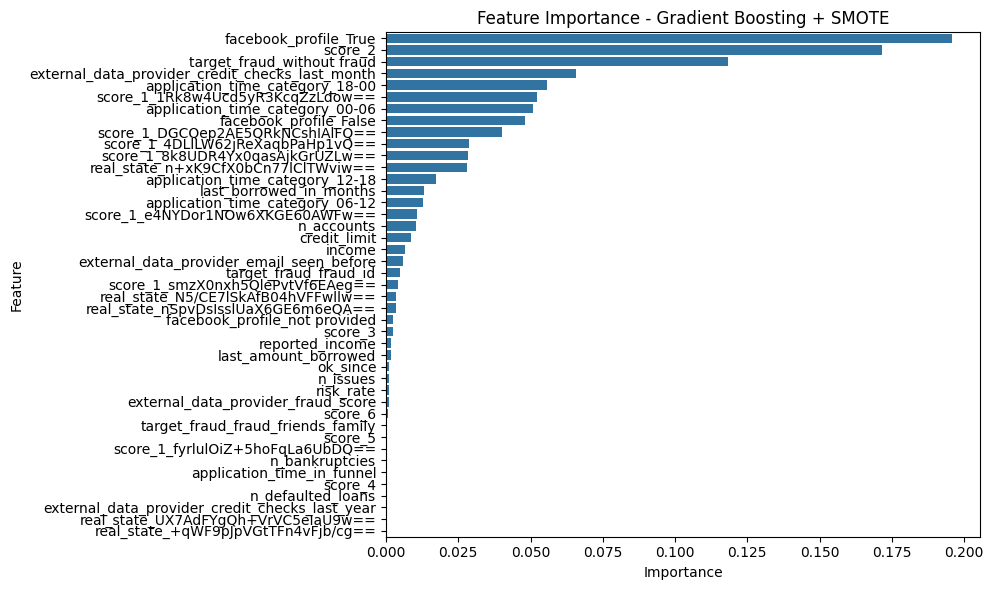

                                            Feature  Importance
29                            facebook_profile_True    0.195742
20                                          score_2    0.171618
38                       target_fraud_without fraud    0.118309
15  external_data_provider_credit_checks_last_month    0.065569
42                  application_time_category_18-00    0.055703
21                 score_1_1Rk8w4Ucd5yR3KcqZzLdow==    0.052210
39                  application_time_category_00-06    0.050683
28                           facebook_profile_False    0.048218
24                 score_1_DGCQep2AE5QRkNCshIAlFQ==    0.040270
22                 score_1_4DLlLW62jReXaqbPaHp1vQ==    0.028875
23                 score_1_8k8UDR4Yx0qasAjkGrUZLw==    0.028429
34              real_state_n+xK9CfX0bCn77lClTWviw==    0.027971
41                  application_time_category_12-18    0.017369
6                           last_borrowed_in_months    0.013307
40                  application_time_cat

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Exemplo: substitua pelo seu dataset real
# X, y = df.drop("target", axis=1), df["target"]
# Aqui vou simular:
# X = df_clean.drop("target_column", axis=1)
# y = df_clean["target_column"]

# Divisão treino/teste
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

# Colunas numéricas (ajuste conforme seu dataset)
num_features = ['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 
        'credit_limit', 'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
        'application_time_in_funnel', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 
        'external_data_provider_email_seen_before', 'external_data_provider_fraud_score', 'reported_income']

# Pipeline com scaler, SMOTE e modelo
pipeline = ImbPipeline(steps=[
    ("scaler", ColumnTransformer([
        ("num", StandardScaler(), num_features)
    ], remainder='passthrough')),
    ("smote", SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(random_state=42))
])

# Treinar modelo
pipeline.fit(X_train, y_train)

# Importância das features
model = pipeline.named_steps["model"]

# Recuperar nomes das features após transformação
feature_names = num_features + [col for col in X_train.columns if col not in num_features]

# Importância
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance - Gradient Boosting + SMOTE")
plt.tight_layout()
plt.show()

# Mostrar o DataFrame
print(feature_importance_df)


In [34]:
# Selecionar features com importância mínima
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.0001]['Feature']
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]


In [35]:
X_train_reduced.head()

,facebook_profile_True,score_2,target_fraud_without fraud,external_data_provider_credit_checks_last_month,application_time_category_18-00,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,application_time_category_00-06,facebook_profile_False,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,real_state_n+xK9CfX0bCn77lClTWviw==,application_time_category_12-18,last_borrowed_in_months,application_time_category_06-12,score_1_e4NYDor1NOw6XKGE60AWFw==,n_accounts,credit_limit,income,external_data_provider_email_seen_before,target_fraud_fraud_id,score_1_smzX0nxh5QlePvtVf6EAeg==,real_state_N5/CE7lSkAfB04hVFFwllw==,real_state_nSpvDsIsslUaX6GE6m6eQA==,facebook_profile_not provided,score_3,reported_income,last_amount_borrowed,ok_since,n_issues,risk_rate,external_data_provider_fraud_score,score_6,target_fraud_fraud_friends_family,score_5,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,n_bankruptcies,application_time_in_funnel,score_4
0,0,0.257908,1,2,0,0,0,0,0,0,1,1,0,0.0,1,0,4.0,20184.0,40019.80,40.0,0,0,0,0,1,340.0,76109.0,0.00,38.0,4.0,0.26,544,92.870042,0,0.847020,0,0.0,19,99.152286
1,0,0.158149,1,2,1,1,0,1,0,0,0,0,0,0.0,0,0,7.0,0.0,48317.98,26.0,0,0,1,0,0,340.0,140446.0,0.00,44.0,7.0,0.20,253,99.129450,0,0.210806,0,0.0,342,101.423644
2,1,0.098999,1,1,0,0,1,0,1,0,0,0,0,0.0,0,0,9.0,35608.0,60030.76,3.0,0,0,1,0,0,570.0,97117.0,0.00,0.0,9.0,0.23,414,98.034083,0,0.832893,0,0.0,151,95.921783
3,0,0.033755,1,3,1,0,0,1,0,1,0,1,0,36.0,0,0,12.0,27642.0,46531.29,50.0,0,0,0,0,0,390.0,51217.0,15012.31,0.0,12.0,0.11,230,96.835089,0,0.587373,0,0.0,202,98.590815
4,0,0.111632,1,1,0,0,0,0,1,0,0,1,1,0.0,0,0,7.0,0.0,57747.06,15.0,0,0,0,0,1,420.0,104002.0,0.00,0.0,0.0,0.40,58,102.029359,0,0.705368,0,0.0,477,97.737889


Testado os melhores modelos novamente, sem as variávei de importância zero:


Modelo: Gradient Boosting | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.8534
F1-Score (classe 1): 0.3447
LogLoss: 0.3948

Classification Report:
              precision    recall  f1-score   support

           0     0.8729    0.9668    0.9175      4524
           1     0.5798    0.2453    0.3447       844

    accuracy                         0.8534      5368
   macro avg     0.7264    0.6061    0.6311      5368
weighted avg     0.8268    0.8534    0.8274      5368



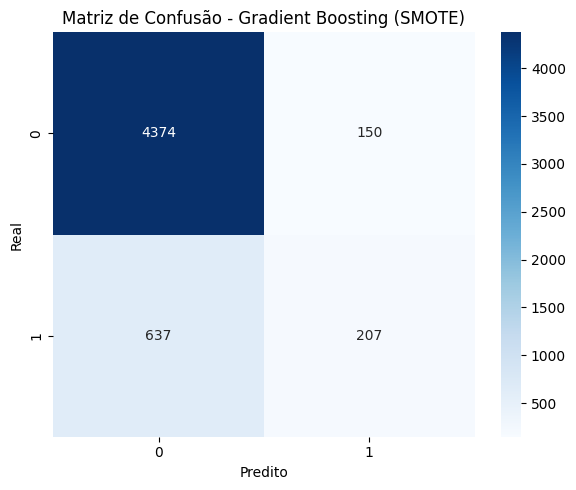


Modelo: Gradient Boosting | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.7001
F1-Score (classe 1): 0.3993
LogLoss: 0.5837

Classification Report:
              precision    recall  f1-score   support

           0     0.9125    0.7124    0.8001      4524
           1     0.2914    0.6339    0.3993       844

    accuracy                         0.7001      5368
   macro avg     0.6020    0.6732    0.5997      5368
weighted avg     0.8149    0.7001    0.7371      5368



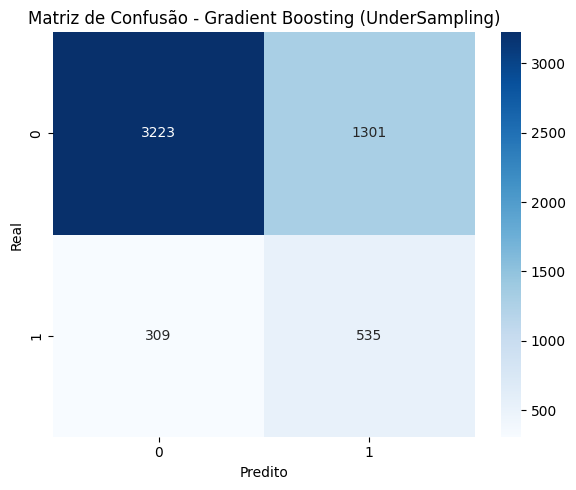


Modelo: XGBoost | Balanceamento: SMOTE


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:32:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.8482
F1-Score (classe 1): 0.3052
LogLoss: 0.4003

Classification Report:
              precision    recall  f1-score   support

           0     0.8680    0.9668    0.9148      4524
           1     0.5441    0.2121    0.3052       844

    accuracy                         0.8482      5368
   macro avg     0.7061    0.5895    0.6100      5368
weighted avg     0.8171    0.8482    0.8189      5368



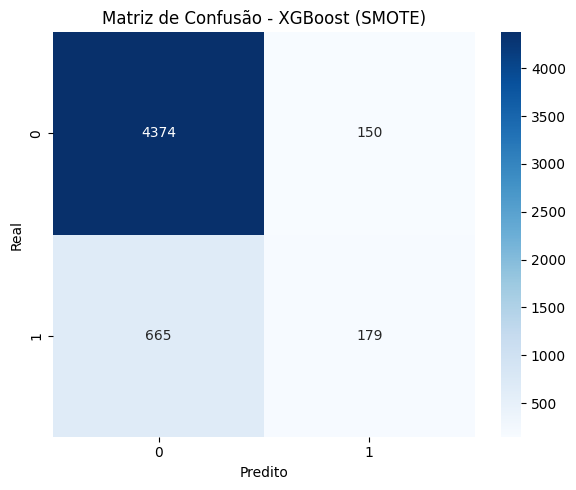


Modelo: XGBoost | Balanceamento: UnderSampling


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.6651
F1-Score (classe 1): 0.3629
LogLoss: 0.6616

Classification Report:
              precision    recall  f1-score   support

           0     0.9021    0.6760    0.7728      4524
           1     0.2588    0.6066    0.3629       844

    accuracy                         0.6651      5368
   macro avg     0.5805    0.6413    0.5678      5368
weighted avg     0.8009    0.6651    0.7084      5368



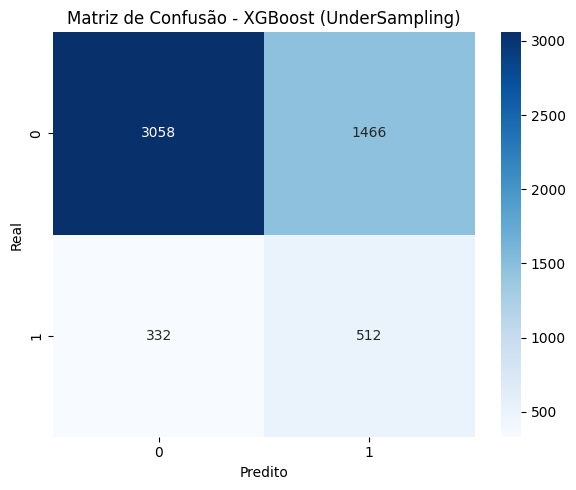


Resumo dos Resultados:
              Modelo  Balanceamento  Acurácia  F1-Score   LogLoss
0            XGBoost  UnderSampling  0.665052  0.362863  0.661555
1  Gradient Boosting  UnderSampling  0.700075  0.399254  0.583661
2            XGBoost          SMOTE  0.848174  0.305200  0.400253
3  Gradient Boosting          SMOTE  0.853390  0.344713  0.394816


In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb

# Modelos
models = {
    #"Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    #"Random Forest": RandomForestClassifier(random_state=42),
    #"K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    #"Decision Tree": DecisionTreeClassifier(random_state=42),
    #"Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Variáveis numéricas para padronização
num_features = ['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 
        'credit_limit', 'income', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
        'application_time_in_funnel', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 
        'external_data_provider_email_seen_before', 'external_data_provider_fraud_score', 'reported_income']


num_features = [col for col in num_features if col in X_train_reduced.columns]

# Separar treino/teste
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_reduced, y_train, stratify=y_train, test_size=0.2, random_state=42)

# Resultados
results = []

# Balanceadores
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "UnderSampling": RandomUnderSampler(random_state=42)
}

# Loop principal
for name, model in models.items():
    for method_name, sampler in resamplers.items():
        print(f"\n{'='*60}\nModelo: {name} | Balanceamento: {method_name}")
        
        # Pipeline
        pipeline = ImbPipeline(steps=[
            ("scaler", ColumnTransformer([
                ("num", StandardScaler(), num_features)
            ], remainder='passthrough')),
            ("sampler", sampler),
            ("classifier", model)
        ])

        # Treinamento
        pipeline.fit(X_train_split, y_train_split)
        
        # Previsões
        y_pred = pipeline.predict(X_val)
        
        # Probabilidades (classe 1)
        if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
            y_proba = pipeline.predict_proba(X_val)
            if y_proba.shape[1] == 2:
                y_proba_1 = y_proba[:, 1]
            else:
                y_proba_1 = np.zeros_like(y_pred, dtype=float)
        else:
            y_proba_1 = np.zeros_like(y_pred, dtype=float)
        
        # Métricas
        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, pos_label=1)
        logloss = log_loss(y_val, y_proba_1, labels=[0, 1])

        # Salva os resultados
        results.append({
            "Modelo": name,
            "Balanceamento": method_name,
            "Acurácia": acc,
            "F1-Score": f1,
            "LogLoss": logloss
        })

        # Prints
        print(f"Acurácia: {acc:.4f}")
        print(f"F1-Score (classe 1): {f1:.4f}")
        print(f"LogLoss: {logloss:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_val, y_pred, digits=4))
        
        # Calcular a matriz de confusão
        cm = confusion_matrix(y_val, y_pred)
        
        # Matriz de confusão (gráfico)
        # Plotar a matriz de confusão com seaborn
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
        plt.title(f"Matriz de Confusão - {name} ({method_name})")
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.tight_layout()
        plt.show()

# Resultados finais
results_df = pd.DataFrame(results)
print("\nResumo dos Resultados:")
print(results_df.sort_values(by="LogLoss", ascending=False).reset_index(drop=True))


## Hyperparameters Tuning

Hyperparameter tuning is **select the best combination of hyperparameters** (e.g., number of estimators, learning rate, or tree depth) that allow the model to generalize well to unseen data, **maximizing its predictive accuracy while minimizing overfitting**.


To this **RandomizedSearchCV will be used**. It randomly samples from the specified hyperparameter space for a given number of iterations and evaluates each combination using cross-validation. RandomizedSearch helps to identify the best performing hyperparameters for the model, balancing accuracy and computational efficiency.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold, cross_validate

# Garantir y em 1D
y_train_split = y_train_split.values.ravel() if hasattr(y_train_split, "values") else y_train_split.ravel()

# Preprocessamento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_features)
    ],
    remainder="passthrough"
)

# Cross-validator com random_state definido
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Pipeline
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("sampler", SMOTE(random_state=42)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

# Espaço de busca
param_distributions = {
    "classifier__n_estimators": randint(100, 300),
    "classifier__learning_rate": uniform(0.01, 0.3),
    "classifier__max_depth": randint(3, 10),
    "classifier__subsample": uniform(0.7, 0.3),
    "classifier__min_samples_split": randint(2, 10)
}

# RandomizedSearchCV com scoring pronto
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    scoring='neg_log_loss',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Rodar a busca
random_search.fit(X_train_split, y_train_split)

# Resultados
print("\nMelhores parâmetros encontrados:")
print(random_search.best_params_)

print("\nMelhor LogLoss (negativo):")
print(random_search.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[CV] END classifier__learning_rate=0.1890550473839461, classifier__max_depth=4, classifier__min_samples_split=4, classifier__n_estimators=174, classifier__subsample=0.8377746675897602; total time= 1.4min
[CV] END classifier__learning_rate=0.1890550473839461, classifier__max_depth=4, classifier__min_samples_split=4, classifier__n_estimators=174, classifier__subsample=0.8377746675897602; total time= 1.4min
[CV] END classifier__learning_rate=0.12236203565420874, classifier__max_depth=7, classifier__min_samples_split=8, classifier__n_estimators=206, classifier__subsample=0.9339073000818308; total time= 3.1min
[CV] END classifier__learning_rate=0.12236203565420874, classifier__max_depth=7, classifier__min_samples_split=8, classifier__n_estimators=206, classifier__subsample=0.9339073000818308; total time= 3.1min
[CV] END classifier__learning_rate=0.12236203565420874, classifier__max_depth=7, classifier__min_samples_split=8, classifier__n_estimators=206, classifier__subsample=0.93390730008183

## Using all Training Data

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
import numpy as np
import pandas as pd



# Preprocessamento
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), num_features)
    ],
    remainder="passthrough"
)


# Pegando os melhores parâmetros encontrados
best_params = random_search.best_params_

# Cross-validator com random_state definido
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Criando o pipeline final com os melhores hiperparâmetros
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # substitua com seu pipeline de pré-processamento real
    ('classifier', GradientBoostingClassifier(
        learning_rate=best_params['classifier__learning_rate'],
        max_depth=best_params['classifier__max_depth'],
        min_samples_split=best_params['classifier__min_samples_split'],
        n_estimators=best_params['classifier__n_estimators'],
        subsample=best_params['classifier__subsample'],
        random_state=42
    ))
])

# Avaliando com cross-validation
scoring = ['f1', 'neg_log_loss']
cv_results = cross_validate(final_pipeline, X_train_reduced, y_train, cv=cv, scoring=scoring, return_train_score=True)

# Mostrando os resultados
print("F1 Score médio (validação):", np.mean(cv_results['test_f1']))
print("Log Loss médio (validação):", -np.mean(cv_results['test_neg_log_loss']))

# DataFrame com todas as métricas por fold (opcional)
df_cv_results = pd.DataFrame(cv_results)
print(df_cv_results)


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/capela/Desktop/JOB/PROJECTS/credit_r

F1 Score médio (validação): 0.28327563639833186
Log Loss médio (validação): 0.3782789537102007
    fit_time  score_time   test_f1  train_f1  test_neg_log_loss  \
0  35.747219    0.110613  0.306569  0.435133          -0.380352   
1  34.874927    0.086236  0.271375  0.434077          -0.377640   
2  32.550540    0.094571  0.272556  0.439404          -0.379667   
3  33.856863    0.095972  0.263551  0.433078          -0.381403   
4  37.593344    0.087735  0.302326  0.434587          -0.372333   

   train_neg_log_loss  
0           -0.295708  
1           -0.298362  
2           -0.296545  
3           -0.293576  
4           -0.298880  


## Saving the Model


In [44]:
import joblib

# Treinar com todos os dados de treino
final_pipeline.fit(X_train_reduced, y_train)

# Salvar modelo treinado
joblib.dump(final_pipeline, 'model_credit_risk.pkl')


/Users/capela/Desktop/JOB/PROJECTS/credit_risk/venv_credit_risk/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['model_credit_risk.pkl']

# Evaluation

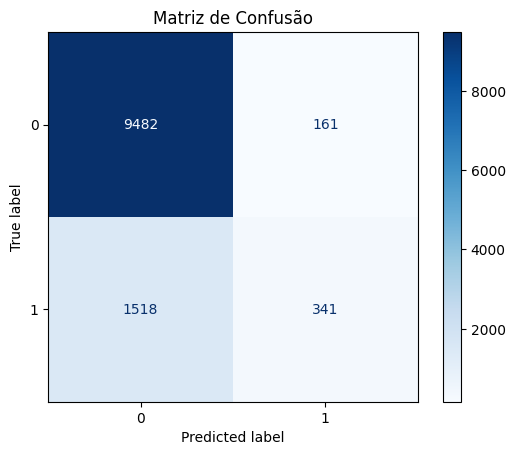

Log Loss: 0.3812
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      9643
           1       0.68      0.18      0.29      1859

    accuracy                           0.85     11502
   macro avg       0.77      0.58      0.60     11502
weighted avg       0.83      0.85      0.82     11502



In [45]:
import joblib
from sklearn.metrics import confusion_matrix, log_loss, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Carregar o pipeline salvo
model = joblib.load('model_credit_risk.pkl')

# Gerar previsões
y_pred = model.predict(X_test_reduced)

# Gerar probabilidades para cálculo do log loss
y_proba = model.predict_proba(X_test_reduced)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()

# Log Loss
ll = log_loss(y_test, y_proba)
print(f'Log Loss: {ll:.4f}')

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)



In [61]:
from sklearn.metrics import classification_report, confusion_matrix, log_loss

# Prever as probabilidades da classe 1
y_proba = model.predict_proba(X_test_reduced)[:, 1]

# Definir novo threshold (ex: 0.3)
threshold = 0.20
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Avaliar com novo limiar
print(f"Threshold: {threshold}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\nLog Loss:", log_loss(y_test, y_proba))  # sempre usar y_proba aqui
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))


Threshold: 0.2
Confusion Matrix:
[[7923 1720]
 [ 915  944]]

Log Loss: 0.3811777434768162

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      9643
           1       0.35      0.51      0.42      1859

    accuracy                           0.77     11502
   macro avg       0.63      0.66      0.64     11502
weighted avg       0.81      0.77      0.79     11502



Now we will perform the **final evaluation of the ensemble model** using the **test data,** which were separated before modeling.

Model evaluation shows **promising results**. After fine-tuning the hyperparameters of the Random Forest and Decision Tree models, their performance was further improved when combined into an ensemble. The final ensemble model demonstrated **strong recall (0.778)**, precision (0.717), and accuracy (0.922) on the test data, indicating its robustness in predicting churn. This performance suggests that the ensemble approach, leveraging the strengths of both models, **is effective for the task at hand and can be trusted for future predictions**.

With these results, **the model is now ready for deployment.** By integrating it into an application, users will be able to input customer data and receive a churn probability score in real-time. This will enable businesses to proactively identify at-risk customers and implement targeted retention strategies. **The model's strong performance ensures that it can be a valuable tool for decision-making,** helping to minimize churn and improve customer satisfaction.